# Logistic Regression Problem

**Importing the Libraries**

In [19]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

**Data Collection and Processing**

In [20]:
# loading the csv data to a Pandas DataFrame
heart_data = pd.read_csv('heart.csv')

In [21]:
# print first 5 rows of the dataset
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Target 1 = Patient has heart Disease, 0 = Patient does not have heart Disease

In [22]:
# number of rows and columns in the dataset
heart_data.shape

(303, 14)

# **Data Exploration**

In [23]:
# checking the distribution of Target Variable
heart_data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

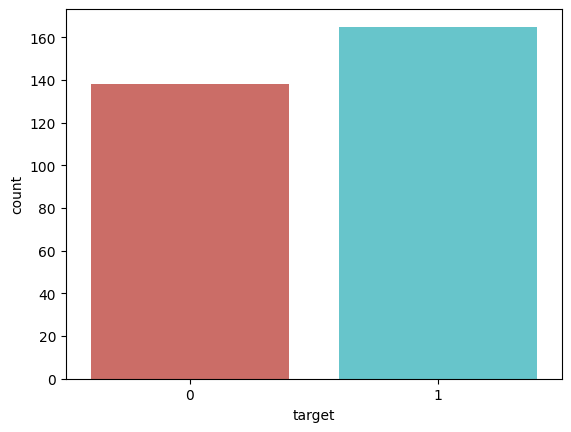

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='target', data=heart_data,palette='hls')
plt.show()

# **Split the data into features(x) and label(y) dataset**

In [25]:
X = pd.DataFrame(heart_data.iloc[:,:-1])
y = pd.DataFrame(heart_data.iloc[:,-1])


In [26]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [27]:
y.head()

,target
0,1
1,1
2,1
3,1
4,1


# **Split the data into training and test set**

In [28]:
#import module to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1)

# **Create and train the model**

In [29]:
#Import module for fitting
from sklearn.linear_model import LogisticRegression

#Create instance (ie.,object of Logistic Regression)
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# **Predicting the test set results**

In [30]:
y_pred = logmodel.predict(X_test)

# Calculating the accuracy

In [31]:
print('Accuracy: %d',(logmodel.score(X_test, y_test)))

Accuracy: %d 0.7704918032786885


# Evaluating model using Confusion Matrix

In [33]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[20 10]
 [ 4 27]]


Left diagonal are values which are correctly classified, right diagonal are values which are incorrectly classified. This shows that there are 20+27 correct predictions and 10+4 incorrect predictions.

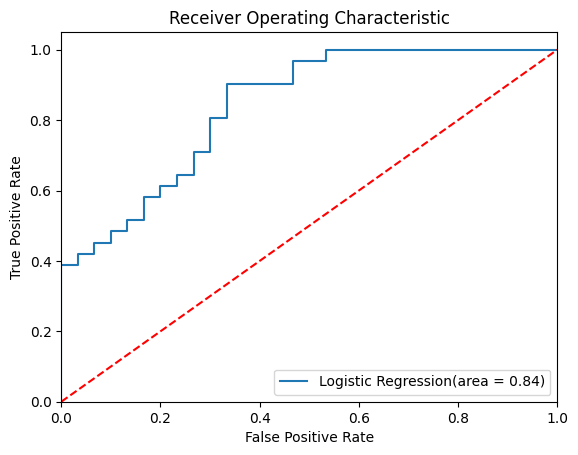

In [38]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logmodel.predict_proba(X_test)[:,1])

fpr, tpr, thresholds = roc_curve(y_test, logmodel.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression(area = %0.2f)' % logit_roc_auc)
plt.plot([0,1],[0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.savefig('log_ROC')
plt.show()


Based on the provided information, the binary classification model has an accuracy of 0.77, which indicates that it correctly classifies around 77% of the test samples. The confusion matrix shows that the model correctly predicted 20 true negatives, 27 true positives, 10 false negatives, and 4 false positives. The high number of false negatives and false positives suggests that the model could benefit from further optimization.

The ROC curve is a useful tool to evaluate the performance of a binary classifier. The curve plots the true positive rate (TPR) against the false positive rate (FPR) at different thresholds, where a perfect classifier would have an ROC curve that reaches the top left corner of the plot, and a random classifier would have an ROC curve that is a diagonal line from the origin to the top right corner.

As mentioned, a good classifier should be as far away from the random classifier's line as possible (towards the top left corner). Therefore, by looking at the ROC curve, one can assess how well the model is performing. If the curve is close to the random classifier's line, then the model's performance is not much better than a random classifier. If the curve is closer to the top left corner, then the model is performing better.

In conclusion, while the model has a decent accuracy, the high number of false negatives and false positives suggests that it could benefit from further optimization. The ROC curve can be used to evaluate the model's performance and determine if it is better than random guessing.





